## ECR Calibration

In [1]:
import sys
import os
import yaml
module_path = os.path.abspath(os.path.join('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control'))
if module_path not in sys.path:
    sys.path.append(module_path)

from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from agent import Agent

from template_configurations import pulse_q_env_config, pulse_circuit_context
from ppo import make_train_ppo

/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Starting Rabi experiment for qubit 0...
Rabi experiment for qubit 0 done.
Starting Drag experiment for qubit 0...
Drag experiments done for qubit 0 done.
Starting Rabi experiment for qubit 1...
Rabi experiment for qubit 1 done.
Starting Drag experiment for qubit 1...
Drag experiments done for qubit 1 done.
All single qubit calibrations are done
Updated Instruction Schedule Map <InstructionScheduleMap(1Q instructions:
  q0: {'sdg', 's', 'rz', 'delay', 'z', 'measure', 'x', 't', 'h', 'sx', 'reset', 'tdg', 'id'}
  q1: {'sdg', 's', 'rz', 'delay', 'z', 'measure', 'x', 't', 'h', 'sx', 'reset', 'tdg', 'id'}
Multi qubit instructions:
  (0, 1): {'cr45p', 'ecr', 'cr45m'}
  (1, 0): {'cr45p', 'ecr', 'cr45m'}
)>
Starting Rabi experiment for qubit 0...
Rabi experiment for qubit 0 done.
Starting Drag experiment for qubit 0...
Drag experiments done for qubit 0 done.
Starting Rabi experiment for qubit 1...
Rabi experiment for qubit 1 done.
Starting Drag experiment for qubit 1...
Drag experiments done fo

In [2]:
pulse_q_env_config.action_space

Box([-1.   -3.14 40.    0.8  -1.   -3.14], [ 1.    3.14 80.    3.    1.    3.14], (6,), float32)

In [3]:
q_env = QuantumEnvironment(pulse_q_env_config)
q_env

{('amp', (0,), 'x'): 0.11848576, ('σ', (0,), 'x'): 40, ('β', (0,), 'x'): 7.1949085368, ('duration', (0,), 'x'): 160, ('angle', (0,), 'x'): 0, ('amp', (0, 1), 'cr45p'): ParameterVectorElement(a[0]), ('tgt_amp', (0, 1), 'cr45p'): ParameterVectorElement(a[4]), ('angle', (0, 1), 'cr45p'): ParameterVectorElement(a[1]), ('tgt_angle', (0, 1), 'cr45p'): ParameterVectorElement(a[5]), ('duration', (0, 1), 'cr45p'): 1168, ('σ', (0, 1), 'cr45p'): ParameterVectorElement(a[2]), ('risefall', (0, 1), 'cr45p'): ParameterVectorElement(a[3]), ('amp', (0, 1), 'cr45m'): ParameterVectorElement(a[0]), ('tgt_amp', (0, 1), 'cr45m'): ParameterVectorElement(a[4]), ('angle', (0, 1), 'cr45m'): ParameterVectorElement(a[1]), ('tgt_angle', (0, 1), 'cr45m'): ParameterVectorElement(a[5]), ('duration', (0, 1), 'cr45m'): 1168, ('σ', (0, 1), 'cr45m'): ParameterVectorElement(a[2]), ('risefall', (0, 1), 'cr45m'): ParameterVectorElement(a[3])}
{('amp', (0,), 'x'): 0.11848576, ('σ', (0,), 'x'): 40, ('β', (0,), 'x'): 7.1949085

QuantumEnvironment composed of 2 qubits, 
Defined target: gate (Instruction(name='ecr', num_qubits=2, num_clbits=0, params=[]))
Physical qubits: [0, 1]
Backend: <qiskit_dynamics.backend.dynamics_backend.DynamicsBackend object at 0x2d5f3b130>,
Abstraction level: pulse,
Run options: N_shots (1), Sampling_Pauli_space (100), 
Batchsize: 96, 

In [4]:
from gymnasium.wrappers.rescale_action import RescaleAction

min_action = 0
max_action = 1
wrapped_env = RescaleAction(q_env, min_action=min_action, max_action=max_action)

In [5]:
q_env.parameters.params

[ParameterVectorElement(a[0]),
 ParameterVectorElement(a[1]),
 ParameterVectorElement(a[2]),
 ParameterVectorElement(a[3]),
 ParameterVectorElement(a[4]),
 ParameterVectorElement(a[5])]

In [6]:
q_env.circuit_truncations[0].calibrations['custom_ecr'].items()

dict_items([(((0, 1), (ParameterVectorElement(a[0]), ParameterVectorElement(a[1]), ParameterVectorElement(a[2]), ParameterVectorElement(a[3]), ParameterVectorElement(a[4]), ParameterVectorElement(a[5]))), ScheduleBlock(ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=1168, sigma=a[2], width=-2.0*a[2]*a[3] + 1168, amp=a[0], angle=a[1]), ControlChannel(0)), Play(GaussianSquare(duration=1168, sigma=a[2], width=-2.0*a[2]*a[3] + 1168, amp=a[4], angle=a[5]), DriveChannel(1)), name="cr45p", transform=AlignLeft()), ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=7.1949085368, amp=0.11848576, angle=0), DriveChannel(0)), name="x", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=1168, sigma=a[2], width=-2.0*a[2]*a[3] + 1168, amp=a[0], angle=a[1] + 3.14159265358979), ControlChannel(0)), Play(GaussianSquare(duration=1168, sigma=a[2], width=-2.0*a[2]*a[3] + 1168, amp=a[4], angle=a[5] + 3.14159265358979), DriveChannel(1)), name="cr45m", transform=AlignLeft()), name="bl

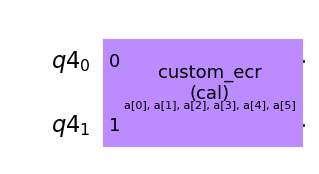

In [7]:
q_env.circuit_truncations[0].draw('mpl')

In [8]:
with open(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
        "r",
) as f:
    agent_config = yaml.safe_load(f)

In [9]:
from ppo import make_train_ppo

ppo_agent = make_train_ppo(agent_config, wrapped_env)

/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.seed to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.seed` for environment variables or `env.get_wrapper_attr('seed')` that will search the reminding wrappers.
  logger.warn(
/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.batch_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.batch_size` for environment variables or `env.get_wrapper_attr('batch_size')` that will search the reminding wrappers.
  logger.warn(
/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.tgt_instruction_counts to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.tgt

In [10]:
ppo_agent(total_updates=4, print_debug=True)

/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.clear_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.clear_history` for environment variables or `env.get_wrapper_attr('clear_history')` that will search the reminding wrappers.
  logger.warn(
  0%|          | 0/4 [00:00<?, ?it/s]

Mean action tensor([[-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173],
        [-0.0595,  0.0114,  

/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reward_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reward_history` for environment variables or `env.get_wrapper_attr('reward_history')` that will search the reminding wrappers.
  logger.warn(
 25%|██▌       | 1/4 [00:08<00:26,  8.73s/it]

mean tensor([-0.0595,  0.0114,  0.1245,  0.0801,  0.0521, -0.1173])
sigma tensor([0.4808, 0.4746, 0.4855, 0.4941, 0.5140, 0.4847])
Average return: 1.4625000000000001
Mean action tensor([[0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064],
        [0

 50%|█████     | 2/4 [00:33<00:36, 18.14s/it]

mean tensor([0.3747, 0.1818, 0.3152, 0.2939, 0.1903, 0.1064])
sigma tensor([0.4039, 0.3965, 0.4828, 0.5049, 0.4724, 0.4115])
Average return: 1.7861111111111114
Mean action tensor([[ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762],
        [ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.176

 75%|███████▌  | 3/4 [00:41<00:13, 13.75s/it]

mean tensor([ 0.1988, -0.4441, -0.0234, -0.1556, -0.4547, -0.1762])
sigma tensor([0.9975, 0.9979, 0.9978, 0.9977, 0.9964, 0.9975])
Average return: 2.8908045977011496
Mean action tensor([[ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665],
        [ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, 

100%|██████████| 4/4 [00:49<00:00, 12.46s/it]

mean tensor([ 0.2660, -0.4935, -0.0312, -0.1670, -0.4980, -0.1665])
sigma tensor([0.9994, 0.9995, 0.9994, 0.9994, 0.9991, 0.9993])
Average return: 1.5


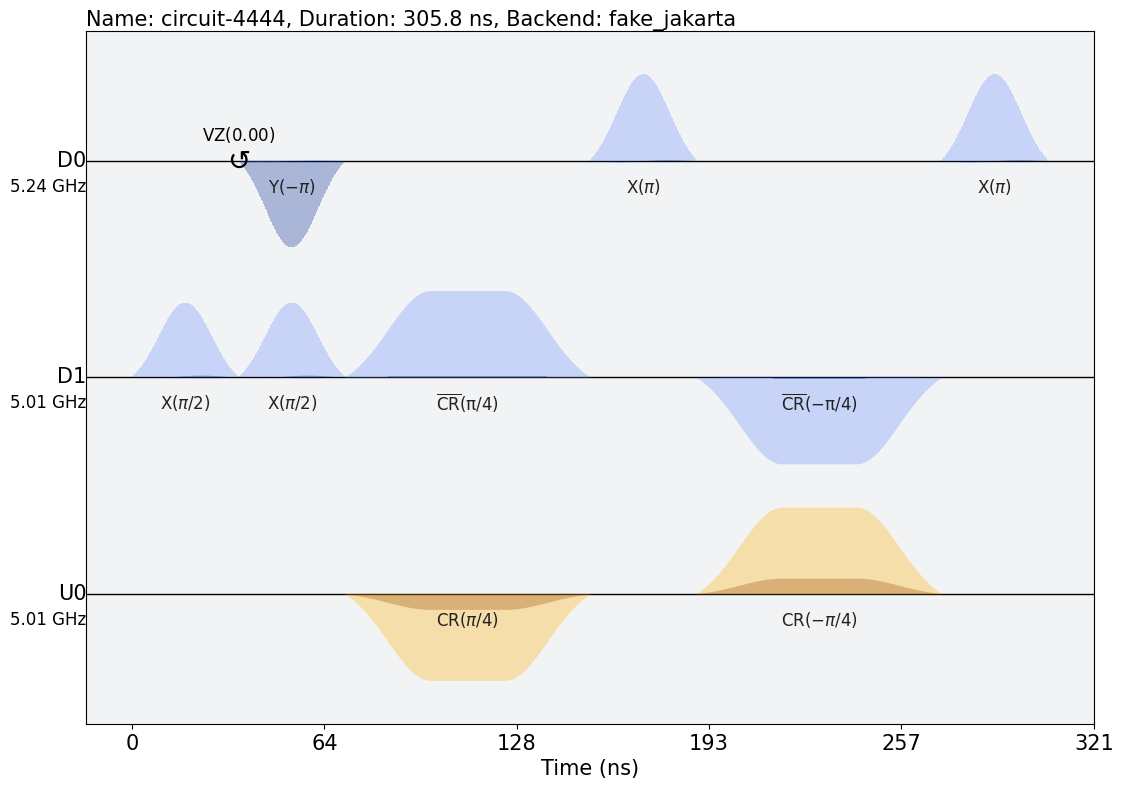

In [11]:
from qiskit import QuantumCircuit, transpile, schedule
from qiskit.visualization.pulse_v2 import draw
from qiskit.providers.fake_provider import FakeJakarta
backend = FakeJakarta()
qc = QuantumCircuit(2)
qc.ecr(0, 1)
qc = transpile(qc, backend, layout_method='trivial')
sched = schedule(qc, backend)
 
draw(sched, backend=backend)

In [12]:
from helper_functions import get_ecr_params

default_params, pulse_features, basis_gate_instructions, instructions_array = get_ecr_params(q_env.backend, list(range(q_env.tgt_register.size)))

In [13]:
pulse_features

['amp', 'angle', 'duration', 'σ', 'β', 'risefall', 'tgt_amp', 'tgt_angle']

In [14]:
default_params

{('amp', (0,), 'x'): 0.11848576,
 ('σ', (0,), 'x'): 40,
 ('β', (0,), 'x'): 7.1949085368,
 ('duration', (0,), 'x'): 160,
 ('angle', (0,), 'x'): 0,
 ('amp', (0, 1), 'cr45p'): 0.5,
 ('tgt_amp', (0, 1), 'cr45p'): 0,
 ('angle', (0, 1), 'cr45p'): 0,
 ('tgt_angle', (0, 1), 'cr45p'): 0,
 ('duration', (0, 1), 'cr45p'): 1168,
 ('σ', (0, 1), 'cr45p'): 64,
 ('risefall', (0, 1), 'cr45p'): 2.0,
 ('amp', (0, 1), 'cr45m'): 0.5,
 ('tgt_amp', (0, 1), 'cr45m'): 0,
 ('angle', (0, 1), 'cr45m'): 0,
 ('tgt_angle', (0, 1), 'cr45m'): 0,
 ('duration', (0, 1), 'cr45m'): 1168,
 ('σ', (0, 1), 'cr45m'): 64,
 ('risefall', (0, 1), 'cr45m'): 2.0}